In [41]:
import os
import pandas as pd
import numpy as np

In [2]:
digfirst_df = pd.read_csv('../download_papers/data/dig_first.csv', names=['Department', 'Name', 'Staff', 'Authors', 'Title', 'DOI'], header=0)
digfirst_df = digfirst_df[['Name', 'Department', 'DOI']].dropna()
digfirst_df.head()

,Name,Department,DOI
1,"Tobin, Mark",Physics,10.1038/nature14474
3,"Wang, Zhenxin",Chemistry,10.1038/nature14474
4,"Thomas, C",School of Engineering,10.1038/nature14474
6,"Lu, Yi",Electrical Engineering and Electronics,10.1038/nature14474
7,"Zhang, Jinghua",Electrical Engineering and Electronics,10.1038/nature14474


In [3]:
doi_map_df = []
error_dict = {
    'DOI': [],
    'status': []
}

for filename in os.listdir('../download_papers/logs'):
    if 'doi_map.csv' in filename:
        df = pd.read_csv('../download_papers/logs/{}'.format(filename), names=['DOI', 'identifier'], header=0)
        doi_map_df.append(df)
    elif 'fatal_error.log' in filename:
        with open('../download_papers/logs/{}'.format(filename), 'r', encoding='latin-1') as f:
            for line in f:
                try:
                    line = line.replace('\n', '')
                    line = line.split(',')
                    
                    if len(line) < 5:
                        continue
                    
                    error_dict['DOI'].append(line[-2])
                    error_dict['status'].append(False)
                except Exception as e:
                    print('Error {}\n{}'.format(e, line))
    else:
        continue

doi_df = pd.concat(doi_map_df, axis=0, ignore_index=True)
error_df = pd.DataFrame(error_dict)
print('({}, {})'.format(len(doi_df), len(error_df)))
print('Success rate {}'.format( len(doi_df) / (len(doi_df) + len(error_df)) * 100 ))

(33974, 48668)
Success rate 41.10984729314392


In [5]:
error_df.head()

,DOI,status
0,10.1159/000505342,False
1,10.1016/s2213-2600(20)30013-8,False
2,10.1177/1460408619895677,False
3,10.1136/sextrans-2019-sti.33,False
4,10.1109/tencon.2019.8929635,False


In [6]:
doi_df = doi_df[['DOI']]
doi_df['status'] = True
doi_df.head()

,DOI,status
0,10.3390/atmos10120774,True
1,10.1037/bul0000220,True
2,10.1101/2020.01.16.909507,True
3,10.18678/dtfd.621788,True
4,10.1155/2020/2893289,True


In [7]:
doi_merged_df = pd.merge(digfirst_df, doi_df, on="DOI")
doi_merged_df

,Name,Department,DOI,status
0,"Wingfield, Thomas","Clinical Infection, Microbiology and Immunology",10.1371/journal.pmed.1001675,True
1,"Wingfield, Thomas","Clinical Infection, Microbiology and Immunology",10.1155/2014/164826,True
2,"Wingfield, Thomas","Clinical Infection, Microbiology and Immunology",10.1093/infdis/jiu121,True
3,"Wingfield, Thomas","Clinical Infection, Microbiology and Immunology",10.7861/clinmedicine.13-2-152,True
4,"Peters, Lynne",School of Health Sciences,10.1093/jat/bku031,True
...,...,...,...,...
178014,"Gusev, Vladimir",Chemistry,10.1088/1742-6596/1347/1/012090,True
178015,"Gusev, Vladimir",Chemistry,10.1088/1742-6596/1400/7/077019,True
178016,"Frith, Lucy",Health Services Research,10.1136/medethics-2019-106045,True
178017,"Wolf, Judith",School of Environmental Sciences,10.1002/ece3.5973,True


In [8]:
error_merged_df = pd.merge(digfirst_df, error_df, on="DOI")
error_merged_df

,Name,Department,DOI,status
0,"Wingfield, Thomas","Clinical Infection, Microbiology and Immunology",10.1177/0956462414531936,False
1,"Wingfield, Thomas","Clinical Infection, Microbiology and Immunology",10.12968/bjon.2014.23.2.90,False
2,"Wingfield, Thomas","Clinical Infection, Microbiology and Immunology",10.1016/j.afjem.2015.03.001,False
3,"Alam, Muntasir",Management School,10.1016/j.abb.2015.08.013,False
4,"Alam, Muntasir",Management School,10.1016/j.ijbiomac.2015.05.004,False
...,...,...,...,...
76027,"Shchukin, Dzmitry",Chemistry,10.1039/c9ta13021g,False
76028,"Coomber, Ross","Sociology, Social Policy and Criminology",10.1177/0022042619897425,False
76029,"Halford, Jason",Psychological Sciences,10.1159/000505342,False
76030,"Campbell, Kate",Faculty of Health and Life Sciences,10.1159/000505342,False


In [9]:
to_merge = [doi_merged_df, error_merged_df]
merged_df = pd.concat(to_merge, axis=0, ignore_index=True)
merged_df

,Name,Department,DOI,status
0,"Wingfield, Thomas","Clinical Infection, Microbiology and Immunology",10.1371/journal.pmed.1001675,True
1,"Wingfield, Thomas","Clinical Infection, Microbiology and Immunology",10.1155/2014/164826,True
2,"Wingfield, Thomas","Clinical Infection, Microbiology and Immunology",10.1093/infdis/jiu121,True
3,"Wingfield, Thomas","Clinical Infection, Microbiology and Immunology",10.7861/clinmedicine.13-2-152,True
4,"Peters, Lynne",School of Health Sciences,10.1093/jat/bku031,True
...,...,...,...,...
254046,"Shchukin, Dzmitry",Chemistry,10.1039/c9ta13021g,False
254047,"Coomber, Ross","Sociology, Social Policy and Criminology",10.1177/0022042619897425,False
254048,"Halford, Jason",Psychological Sciences,10.1159/000505342,False
254049,"Campbell, Kate",Faculty of Health and Life Sciences,10.1159/000505342,False


In [10]:
dept_aggregate = merged_df.groupby(['Department', 'status']).count()
dept_aggregate

Name   DOI
Department                              status            
Academic Quality And Standards Division False     34    34
                                        True     360   360
Archaeology, Classics and Egyptology    False    410   410
                                        True     953   953
Architecture                            False   1264  1264
...                                              ...   ...
Women's and Children's Health           True     880   880
Work, Organisation and Management       False    309   309
                                        True     129   129
ZZ (DO NOT USE) was Research Policy     False      2     2
                                        True       3     3

[228 rows x 2 columns]

In [23]:
dept_success = dept_aggregate['DOI'].unstack('status')
dept_success['success_rate'] = dept_success[True] / (dept_success[True] + dept_success[False]) * 100
dept_success

status,False,True,success_rate
Department,,,
Academic Quality And Standards Division,34.0,360.0,91.370558
"Archaeology, Classics and Egyptology",410.0,953.0,69.919296
Architecture,1264.0,2693.0,68.056609
Biochemistry,2450.0,3208.0,56.698480
Biostatistics,431.0,870.0,66.871637
...,...,...,...
Vice Chancellor's Office,337.0,194.0,36.534840
Virtual Engineering Centre,167.0,1042.0,86.186931
Women's and Children's Health,843.0,880.0,51.073709


In [24]:
dept_success.describe()

status,False,True,success_rate
count,114.000000,114.000000,112.000000
mean,666.947368,1561.570175,63.683213
std,1108.440648,3020.840843,16.497090
min,1.000000,1.000000,25.000000
25%,52.250000,84.500000,54.696780
50%,249.000000,620.500000,66.533333
75%,717.750000,1386.250000,76.461496
max,6407.000000,18115.000000,92.527473


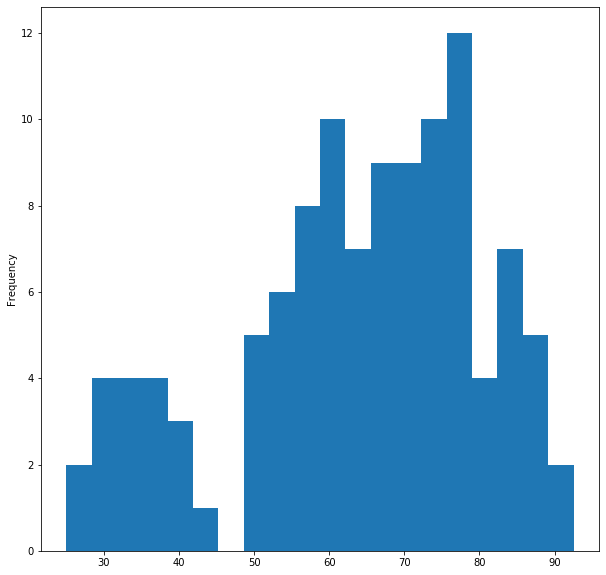

In [36]:
dept_success['success_rate'].plot.hist(bins=20, figsize=(10,10))

In [53]:
dept_success.groupby(pd.cut(dept_success["success_rate"], np.arange(0., 101, 5))).count()['success_rate']

success_rate
(0.0, 5.0]        0
(5.0, 10.0]       0
(10.0, 15.0]      0
(15.0, 20.0]      0
(20.0, 25.0]      1
(25.0, 30.0]      2
(30.0, 35.0]      7
(35.0, 40.0]      6
(40.0, 45.0]      2
(45.0, 50.0]      2
(50.0, 55.0]      9
(55.0, 60.0]     10
(60.0, 65.0]     13
(65.0, 70.0]     17
(70.0, 75.0]     12
(75.0, 80.0]     15
(80.0, 85.0]      6
(85.0, 90.0]      8
(90.0, 95.0]      2
(95.0, 100.0]     0
Name: success_rate, dtype: int64

In [25]:
name_aggregate = merged_df.groupby(['Name', 'status']).count()
name_aggregate

Department  DOI
Name                status                 
A'Court, Andrew     False            6    6
ALMARZOOQI, Maha    False            1    1
Abass, Ahmed        False           10   10
                    True             8    8
Abba, Katharine     False            1    1
...                                ...  ...
das Dores, Lucas    True             1    1
de la Vega, Camilla False            3    3
del Pino, Mariana   True             1    1
wood, Joanne        False            5    5
                    True            17   17

[12705 rows x 2 columns]

In [26]:
name_success = name_aggregate['DOI'].unstack('status')
name_success['success_rate'] = name_success[True] / (name_success[True] + name_success[False]) * 100
name_success

status,False,True,success_rate
Name,,,
"A'Court, Andrew",6.0,NaN,NaN
"ALMARZOOQI, Maha",1.0,NaN,NaN
"Abass, Ahmed",10.0,8.0,44.444444
"Abba, Katharine",1.0,2.0,66.666667
"Abbas, Ali",NaN,1.0,NaN
...,...,...,...
"Zytynska, Sharon",23.0,12.0,34.285714
"das Dores, Lucas",NaN,1.0,NaN
"de la Vega, Camilla",3.0,NaN,NaN


In [27]:
name_success.describe()

status,False,True,success_rate
count,6400.000000,6305.000000,5000.000000
mean,11.880000,28.234576,54.239184
std,38.444566,80.870029,23.487232
min,1.000000,1.000000,1.408451
25%,1.000000,2.000000,34.285714
50%,4.000000,4.000000,50.000000
75%,10.000000,12.000000,73.333333
max,1608.000000,1020.000000,99.415205


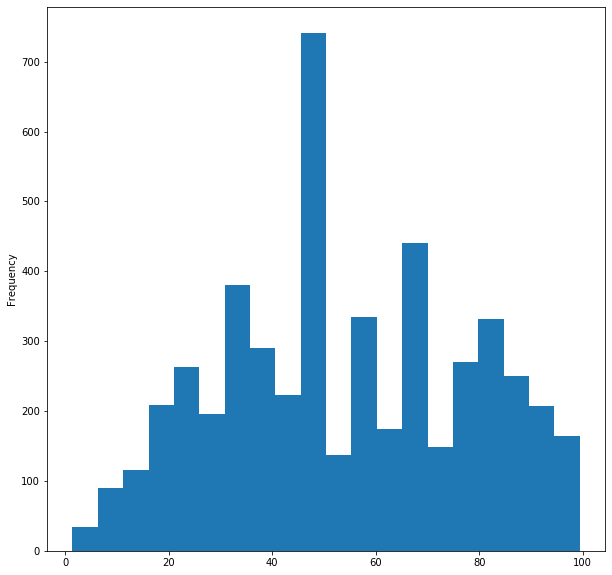

In [35]:
name_success['success_rate'].plot.hist(bins=20, figsize=(10,10))

In [50]:
# G
name_success.groupby(pd.cut(name_success["success_rate"], np.arange(0., 101, 5))).count()['success_rate']

success_rate
(0.0, 5.0]        19
(5.0, 10.0]       78
(10.0, 15.0]     125
(15.0, 20.0]     214
(20.0, 25.0]     264
(25.0, 30.0]     182
(30.0, 35.0]     389
(35.0, 40.0]     301
(40.0, 45.0]     199
(45.0, 50.0]     770
(50.0, 55.0]     123
(55.0, 60.0]     349
(60.0, 65.0]     175
(65.0, 70.0]     440
(70.0, 75.0]     298
(75.0, 80.0]     232
(80.0, 85.0]     235
(85.0, 90.0]     258
(90.0, 95.0]     201
(95.0, 100.0]    148
Name: success_rate, dtype: int64